# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering #


## Implement the intensity transformation  ##



(-0.5, 719.5, 809.5, -0.5)

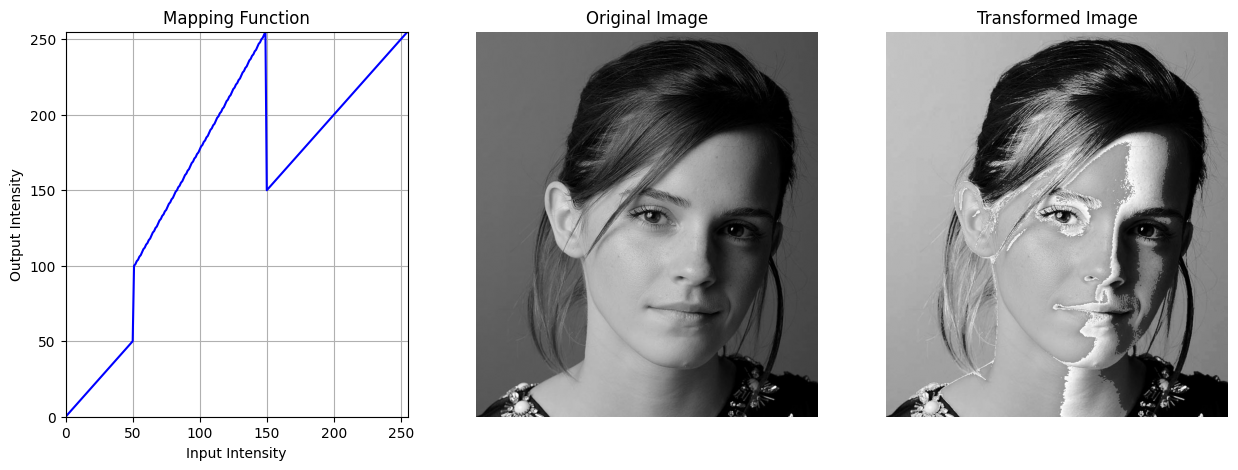

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define breakpoints and mappings
# Each tuple: (input_intensity, output_intensity)
cp_emma = np.array([
    (0, 0),
    (50, 50),
    (51, 100),
    (149, 255),
    (150, 150),
    (255, 255)
], dtype=np.float32)

# Create LUT
LUT = np.zeros(256, dtype=np.uint8)

def linear_transform(control_points,lut ):
    for i in range(len(control_points) - 1):
        x1, y1 = control_points[i]
        x2, y2 = control_points[i + 1]
        slope = (y2 - y1) / (x2 - x1)
        for x in range(int(x1), int(x2) + 1):
            lut[x] = np.clip(slope * (x - x1) + y1, 0, 255)
    return lut
            
LUT = linear_transform(cp_emma, LUT)
# Read image in grayscale
img_orig = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(LUT, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.subplot(132)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')
plt.axis('off')

img_transformed = cv2.LUT(img_orig, LUT)
plt.subplot(133)
plt.imshow(img_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')




##  Brain Proton Density Image ##


### White Matter ###


NameError: name 'w_lut' is not defined

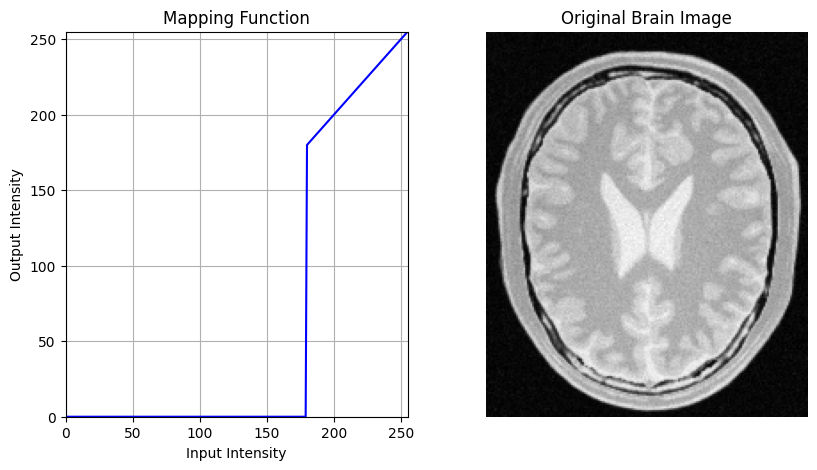

In [2]:
cp_wm = np.array([
    (0,0),
    (179,0),
    (180,180),
    (255,255)
])

wm_lut = np.zeros(256, dtype=np.uint8)

wm_lut = linear_transform(cp_wm, wm_lut)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(wm_lut, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)



img_brain = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

plt.subplot(132)
plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

img_brain_transformed_WM = cv2.LUT(img_brain, w_lut)

plt.subplot(133)
plt.imshow(img_brain_transformed_WM, cmap='gray')
plt.title('Transformed Brain Image')
plt.axis('off')

plt.show

### Gray Matter


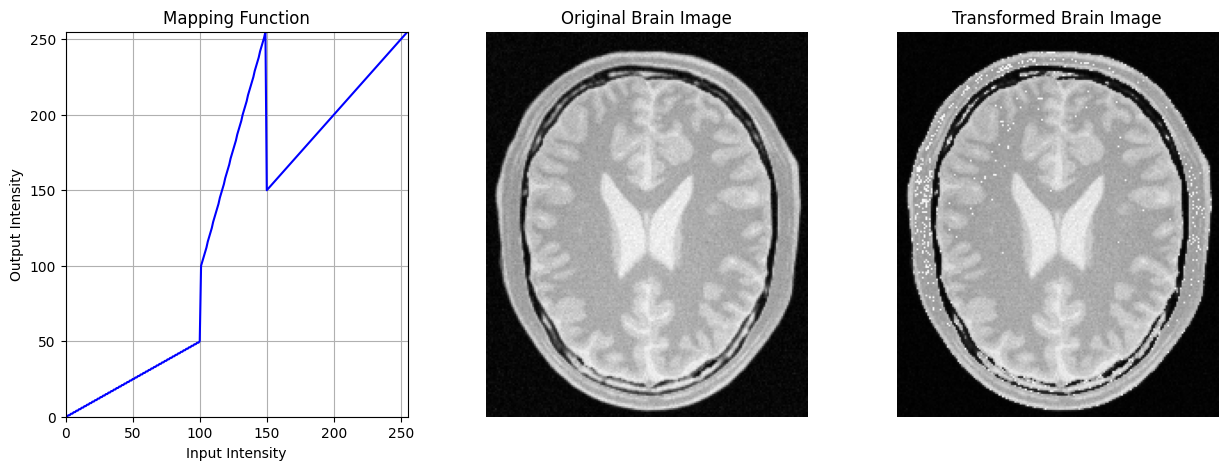

In [ ]:
cp_gm = np.array([
   (0, 0),
    (100, 50),
    (101, 100),
    (149, 255),
    (150, 150),
    (255, 255)
], )

   
gm_lut = np.zeros(256, dtype=np.uint8) 
gm_lut = linear_transform(cp_gm, gm_lut)
img_brain_transformed_GM = cv2.LUT(img_brain, gm_lut)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(gm_lut, color='blue')
plt.title('Mapping Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)


plt.subplot(132)

plt.imshow(img_brain, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(img_brain_transformed_GM, cmap='gray')
plt.title('Transformed Brain Image')
plt.axis('off')

plt.show()



## Applying Gamma Correction

In [3]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)

img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)

img_ceilab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)        # Convert the image into CEILAB color space  
l_channel, a_channel, b_channel = cv.split(img_ceilab)      # Split the converted image into three channels     

#region
plt.figure(figsize=(12,6))

plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(l_channel, cmap="gray")
plt.title('L Channel of the Image')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap="gray")
plt.title('A Channel of the Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap="gray")
plt.title('B Channel of the Image')
plt.axis('off')

plt.tight_layout()
#endregion

gamma = 0.78
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0, 256)]).astype('uint8')
l_channel_gamma_corrected = cv.LUT(l_channel, table)        # Apply gamma correction only for L channel
img_gamma = cv.merge((l_channel_gamma_corrected, a_channel, b_channel))     # Merge L channel with other channels
img_corrected = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB)

#region
fig, ax = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(12,6))
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image')

ax[1].imshow(img_corrected)
ax[1].set_title('Gamma Corrected Image')
#endregion

f, ax = plt.subplots(1, 2, figsize=(12, 4))
space = ('l', 'a', 'b')
color = ('r', 'g', 'b')

for i, c in enumerate(space):
    hist_orig = cv.calcHist([img_ceilab], [i], None, [256], [0, 256])       # Calculate histogram for original image
    ax[0].plot(hist_orig, color=color[i])
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0, 256])       # Calculate histogram for gamma corrected image
    ax[1].plot(hist_gamma, color=color[i])

#region   
ax[0].set_title('Histogram of the Original Image')
ax[0].set_xlabel('Pixels')
ax[0].set_ylabel('Frequency')


ax[1].set_title('Histogram of the Gamma Corrected Image')
ax[1].set_xlabel('Pixels')
ax[1].set_ylabel('Frequency')

#endregion

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
